# Importing libraries

In [9]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
# open source implementation of LBP
from skimage.feature import local_binary_pattern
# data preprocessing and metrics module in scikit-learn
from sklearn import preprocessing, metrics
# SVM implementation in scikit-learn
from sklearn.svm import LinearSVC

In [10]:
import os
import zipfile
import urllib.request
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Features Extraction (LBP)


In [11]:
def compute_lbp(arr):
    
    #Find LBP of all pixels.
    #Also perform Vectorization/Normalization to get feature vector.
    
    # LBP function params
    radius = 3
    n_points = 8 * radius
    n_bins = n_points + 2
    lbp = local_binary_pattern(arr, n_points, radius, 'uniform')
    lbp = lbp.ravel()
    # feature_len = int(lbp.max() + 1)
    feature = np.zeros(n_bins)
    for i in lbp:
        feature[int(i)] += 1
    feature /= np.linalg.norm(feature, ord=1)
    return feature

# Preparing the data , loading and pre processing 

In [38]:
Categories=['Medium','Mild','Severe']
datadir= r'C:\Users\ranaw\Desktop\Research\90%\Skin\Severity\severity-dataset'
data_arr=[] #input array
target_arr=[] #output array
labels=[]
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
      if (os.path.join(path,img).endswith('.jpg')):
        labels.append(i)
        img_array=cv2.imread(os.path.join(path,img),0) #this time we will be reading our data in grayscale
        img_resized=resize(img_array,(512,384))
        data_arr.append(img_resized)
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : Medium
loaded category:Medium successfully
loading... category : Mild
loaded category:Mild successfully
loading... category : Severe
loaded category:Severe successfully


In [13]:
data=np.array(vec)
target=np.array(target_arr)

In [14]:
np.shape(data)

(922, 26)

# Preparing the dataframe

In [15]:
df=pd.DataFrame(vec) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

# Applying the model

In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}#yufy
svc=svm.SVC(probability=True)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
svc.fit(x_train,y_train)
print('The Model is trained with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained with the given images


# Testing the model

In [18]:
from sklearn.metrics import accuracy_score
y_pred=svc.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 1 1 1 1 2 1 2
 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 2 2 2 2 1 1
 2 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2]
The actual data is:
[0 1 0 2 1 1 0 0 2 2 0 0 1 2 2 1 1 2 0 0 0 1 1 1 2 1 2 1 1 1 1 1 2 2 1 0 1
 0 0 2 2 2 1 2 1 2 2 2 2 2 1 0 0 0 1 0 1 2 0 0 2 2 0 1 1 1 0 0 0 2 2 1 0 1
 1 1 2 0 2 2 1 2 2 0 0 0 0 1 1 0 0 1 2 2 0 1 1 1 0 0 2 1 1 2 2 2 0 0 0 1 1
 2 2 1 2 0 0 1 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 2 2 2 1 2 2 1 1 1 1 1 2 2 2
 0 1 2 2 2 0 0 1 0 1 1 1 1 2 1 0 1 1 0 2 0 1 0 0 2 1 2 0 1 2 2 0 1 0 2 2 0]
The model is 80.867% accurate


# Testing the model on external images

Enter URL of Image :https://th.bing.com/th/id/OIP.6OnWj-B2ZpB-qlm6YXPY6AAAAA?pid=ImgDet&rs=1


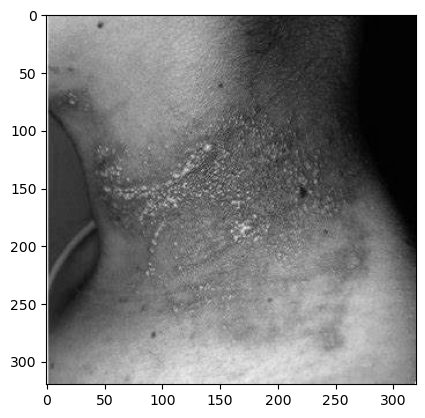

C:\Users\ranaw\anaconda3\envs\Tensorflow\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Medium = 26.28343329999091%
Mild = 21.8044581822794%
Severe = 51.91210851772965%
The predicted image is : Severe


C:\Users\ranaw\AppData\Local\Temp\ipykernel_39416\1267318978.py:12: DeprecationWarning: remove: path should be string, bytes or os.PathLike, not ndarray
  os.remove(img)


ValueError: remove: embedded null character in path

In [20]:
url=input('Enter URL of Image :')
img=imread(url,as_gray=True)
plt.imshow(img,cmap='gray')
plt.show()
img_resize=resize(img,(512,384))
l=compute_lbp(img_resize)
L=l.reshape(1, -1)
probability=svc.predict_proba(L)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[svc.predict(L)[0]])
os.remove(img)

In [21]:
import joblib

# Save the trained model to an HDF5 file
model_filename = 'skin_disease_severity.h5'
joblib.dump(svc, model_filename)

print('The Model is trained and saved as', model_filename)

The Model is trained and saved as skin_disease_severity.h5


In [33]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score

loaded_model = joblib.load('skin_disease_severity.h5')

# Make predictions on the test set
y_pred = loaded_model.predict(x_test)



target_names = ['Medium', 'Mild', 'Severe']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Medium       0.80      0.79      0.80       371
        Mild       0.81      0.82      0.81       389
      Severe       0.82      0.82      0.82       352

    accuracy                           0.81      1112
   macro avg       0.81      0.81      0.81      1112
weighted avg       0.81      0.81      0.81      1112



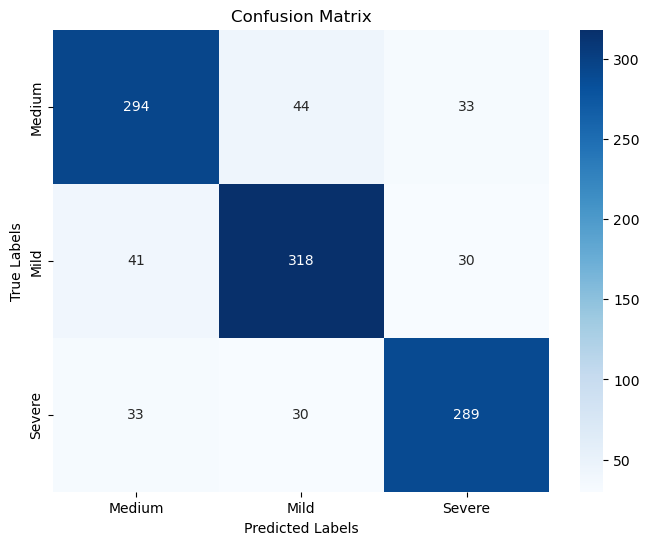

F1 Score: 0.810226613176841
Mean Absolute Error: 0.24910071942446044


In [37]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ["Medium", "Mild", "Severe"]
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print('F1 Score:', f1)
print('Mean Absolute Error:', mae)
